 master-thesisInput:
- True Observations
- Number Training Steps

Output:
- New Model Parameter

Parts of Optimization:
- Initialization of Model Parameter
- tbd

# Initialization

## Import Libraries and Mount Drive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import torch
from torch import distributions, optim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GitHub/master-thesis

import sys
sys.path.append('/content/gdrive/My Drive/GitHub/master-thesis')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GitHub/master-thesis


In [3]:
#%cd ..

In [4]:
from model.methods import *
from model.modelcore import epid_model
from model.modelhelper import *

## Optimization Settings

In [5]:
observation = 'hospitalization' #'newly_infected' #'hospitalization'
rolling_avg_obs = 2
# Overall Time Period
start_time='2020-08-01' # Mitte November/ Anfang Dezember bis Februar
end_time='2021-02-01' # Begin Vaccination Wave


train_test_split_time=end_time#'2020-12-01'


dtype = torch.float32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #cuda:0

## Initialize Observations

In [6]:
df_obs_initial = pd.read_csv('data/220309_observations.csv' , sep=';', thousands='.', decimal=',', encoding='utf-8', parse_dates=['Date'])

# Initialize Observations Training
df_obs_train, initial_newly_infected = initialize_observations(df_obs_initial, start=start_time, end=train_test_split_time, rolling_avg=rolling_avg_obs)
observed_train = torch.tensor(df_obs_train[observation], requires_grad=False, device=device, dtype=dtype)

# Initialize Observations Testing
df_obs_test, _ = initialize_observations(df_obs_initial, start=train_test_split_time, end=end_time, rolling_avg=rolling_avg_obs)
observed_test = torch.tensor(df_obs_test[observation], requires_grad=False, device=device, dtype=dtype)

# Create df_obs
observed_train_test = torch.concat((observed_train, observed_test))
df_obs = pd.concat([df_obs_train, df_obs_test])
df_obs = df_obs.reset_index(drop=True)
df_obs.head(3)

,Date,number_of_deaths,newly_infected,hospitalization
0,2020-08-01,0.5,61.0,3.5
1,2020-08-02,0.0,71.0,3.0
2,2020-08-03,0.0,97.5,4.5


In [7]:
#for column in df_obs.columns:
#  plt.plot(df_obs['Date'], df_obs[column])
#  plt.title(column)
#  plt.show()

## Initialize Model Parameter

### Initialize helper parameter

In [8]:
cero = torch.tensor(0., requires_grad=False, device=device, dtype=dtype)

### Initialize method parameter

In [9]:
method = TwoClusterNN(device=device, dtype=dtype)

### Initialize alpha and phi

In [10]:
dict_param = initialize_parameter(['alpha', 'phi'], device, dtype)
dict_param

{'prime_values': {'alpha': tensor(0.0102, requires_grad=True),
  'phi': tensor(-0.0020, requires_grad=True)},
 'real_values': {'alpha': tensor(0.0280, grad_fn=<AddBackward0>),
  'phi': tensor(25., grad_fn=<AddBackward0>)}}

## Load Method Input Data

In [11]:
method.set_cluster_train(start_time, train_test_split_time)
method.set_cluster_test(train_test_split_time, end_time)
cluster_percentage_train_test = np.concatenate((method.cluster_percentage_train, method.cluster_percentage_test), axis=None)

In [12]:
method.cluster_percentage_test.shape

(0,)

In [13]:
method.cluster_percentage_train

array([0.79488037, 0.74932576, 0.74197943, 0.79777514, 0.80285331,
       0.76034514, 0.65927108, 0.62319501, 0.64614889, 0.62914966,
       0.5720494 , 0.52768223, 0.51293426, 0.54180082, 0.56754543,
       0.48946408, 0.47997819, 0.52183844, 0.55545836, 0.53582371,
       0.49255571, 0.39137833, 0.4727489 , 0.445233  , 0.41331182,
       0.37051053, 0.3369388 , 0.33099756, 0.37317688, 0.30896775,
       0.32511591, 0.28007096, 0.279936  , 0.28444314, 0.33838735,
       0.36834875, 0.37232222, 0.36043436, 0.38224278, 0.32445888,
       0.36978806, 0.34946253, 0.33282137, 0.36000395, 0.38782201,
       0.47296299, 0.56170434, 0.57318253, 0.59597772, 0.6449455 ,
       0.69535766, 0.72931641, 0.70226413, 0.69467683, 0.76139518,
       0.80737158, 0.81862187, 0.81560133, 0.82443158, 0.80878707,
       0.8424168 , 0.85090234, 0.84552151, 0.83193578, 0.88702881,
       0.87374327, 0.90162427, 0.89772755, 0.85529511, 0.85924689,
       0.86703458, 0.84247207, 0.93268017, 0.92603677, 0.96661

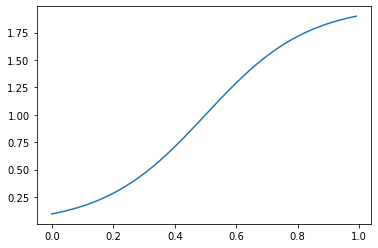

In [14]:
list_y = []
x_ = np.arange(0,1,0.01)
for n in x_:
  x = torch.tensor(n)
  y = torch.tanh(x*3-1.5) + 1
  list_y.append(y)
plt.plot(x_, list_y)

# Optimization

## Training

Step: 0, Learning Rate: 0.00999 Time: 0.0731, Comparison Loss: 114345.921875


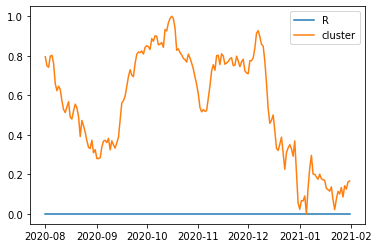

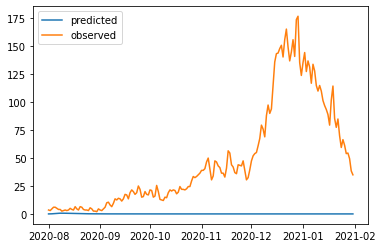

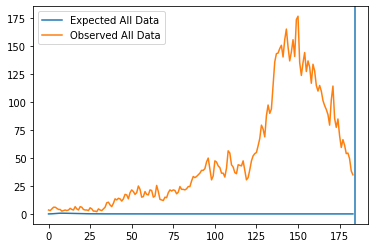

Step: 50, Learning Rate: 0.00950254422568834 Time: 0.1812, Comparison Loss: 113443.078125


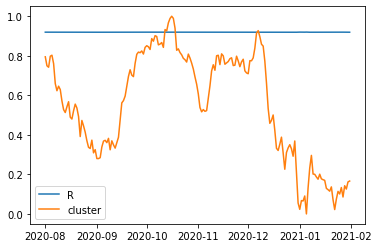

Step: 100, Learning Rate: 0.009038873549665948 Time: 0.1089, Comparison Loss: 38490.86328125


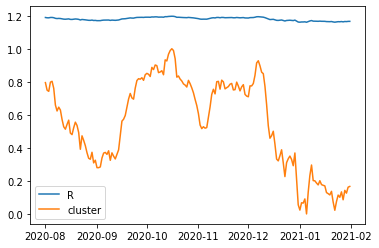

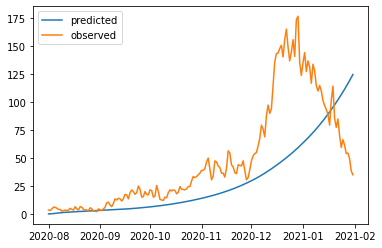

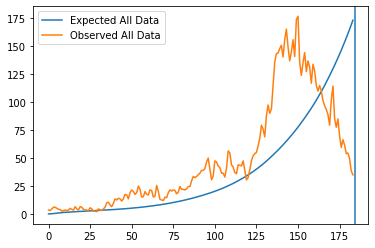

Step: 150, Learning Rate: 0.008597827393003531 Time: 0.0613, Comparison Loss: 31446.41015625


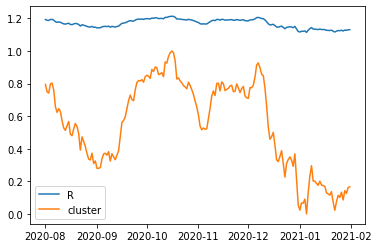

Step: 200, Learning Rate: 0.008178301806491574 Time: 0.0616, Comparison Loss: 25897.12109375


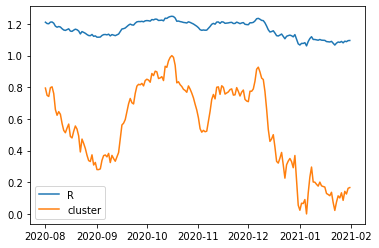

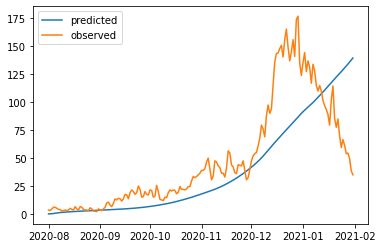

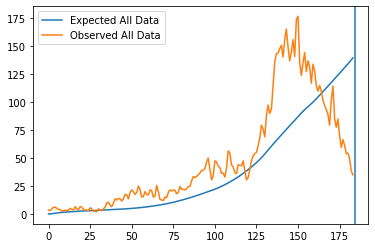

Step: 250, Learning Rate: 0.00777924670742873 Time: 0.0611, Comparison Loss: 4702.41796875


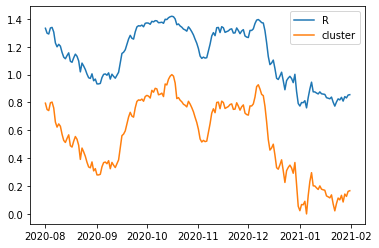

Step: 300, Learning Rate: 0.007399663251239432 Time: 0.0589, Comparison Loss: 3971.520751953125


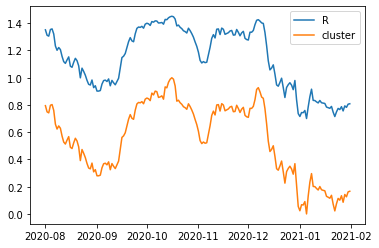

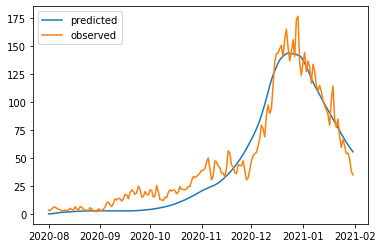

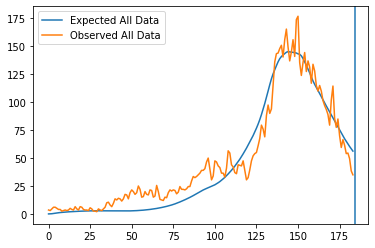

Step: 350, Learning Rate: 0.007038601331341688 Time: 0.0604, Comparison Loss: 3963.1796875


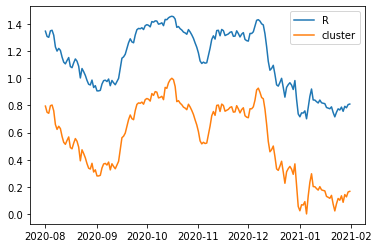

Step: 400, Learning Rate: 0.006695157201007331 Time: 0.0639, Comparison Loss: 3920.625


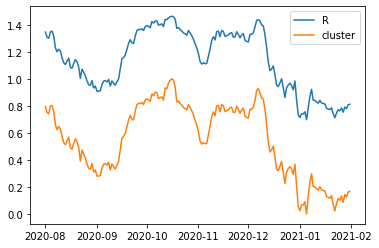

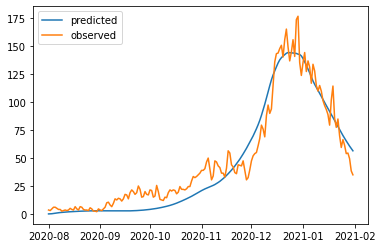

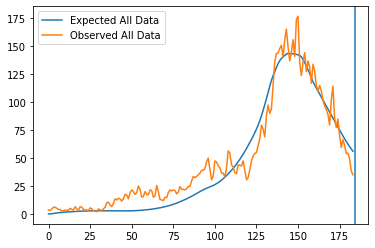

Step: 450, Learning Rate: 0.006368471211262053 Time: 0.063, Comparison Loss: 3933.378173828125


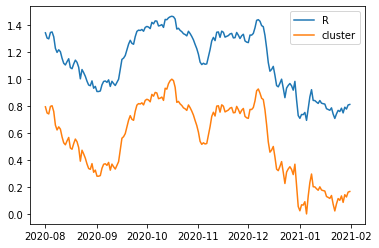

Step: 500, Learning Rate: 0.006057725659163231 Time: 0.0613, Comparison Loss: 3903.471923828125


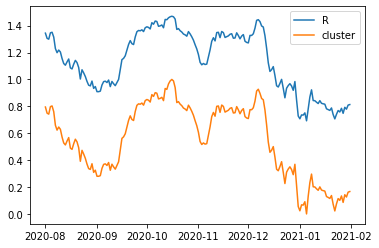

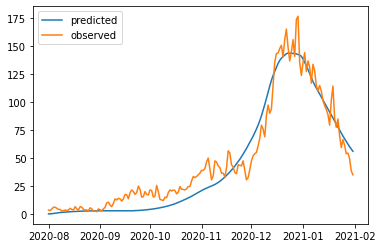

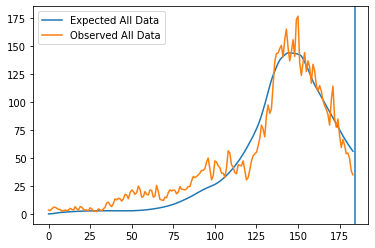

Step: 550, Learning Rate: 0.0057621427410696376 Time: 0.0614, Comparison Loss: 3898.93212890625


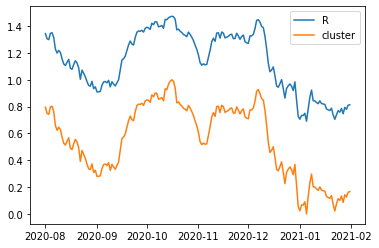

Step: 600, Learning Rate: 0.005480982605780108 Time: 0.0609, Comparison Loss: 3953.305908203125


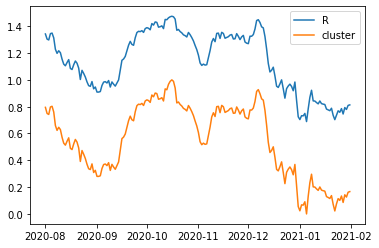

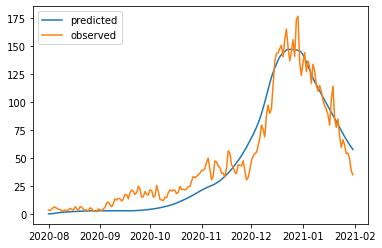

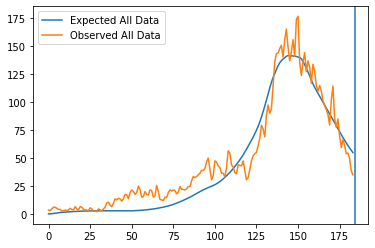

Step: 650, Learning Rate: 0.005213541502668067 Time: 0.0612, Comparison Loss: 3893.79736328125


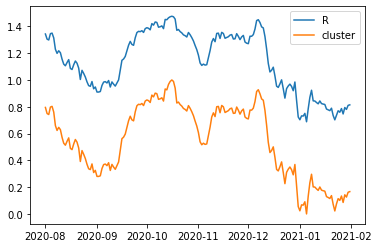

Step: 700, Learning Rate: 0.004959150020176671 Time: 0.0622, Comparison Loss: 3892.117919921875


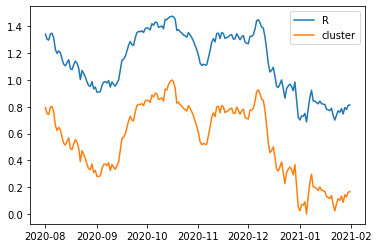

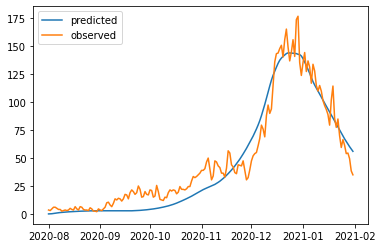

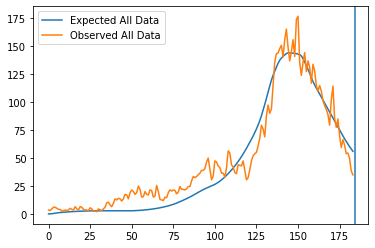

Step: 750, Learning Rate: 0.004717171410265472 Time: 0.0614, Comparison Loss: 3890.69384765625


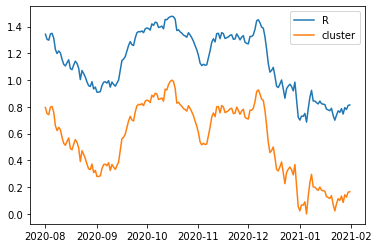

Step: 800, Learning Rate: 0.004486999994614646 Time: 0.0612, Comparison Loss: 3889.31103515625


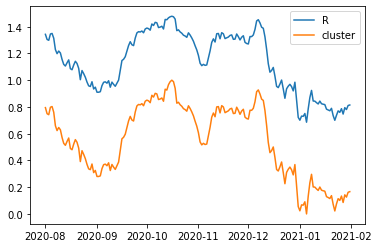

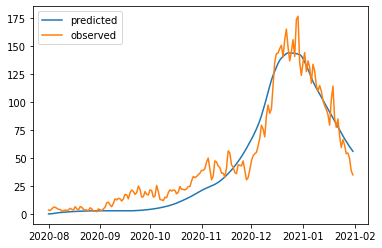

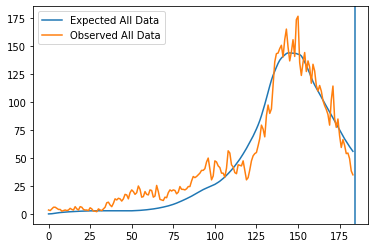

Step: 850, Learning Rate: 0.004268059648597501 Time: 0.0658, Comparison Loss: 3887.935791015625


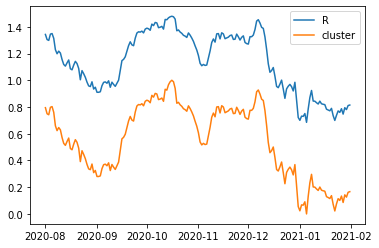

Step: 900, Learning Rate: 0.0040598023592265855 Time: 0.065, Comparison Loss: 3886.569091796875


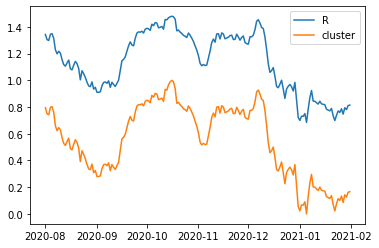

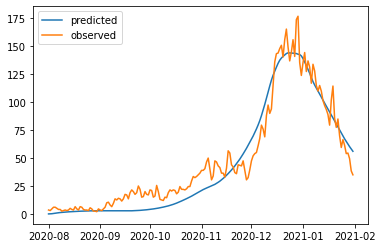

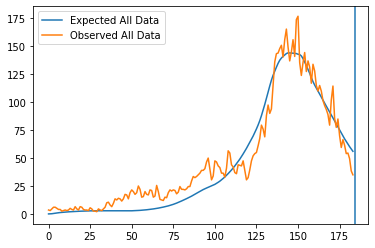

Step: 950, Learning Rate: 0.0038617068534639145 Time: 0.0611, Comparison Loss: 3885.313232421875


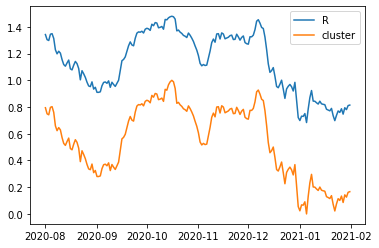

In [15]:
from torch.optim.lr_scheduler import ExponentialLR

epochs = 1000
# model_parameter = [dict_param['prime_values']['alpha'], dict_param['prime_values']['phi']] + [dict_param['prime_values']['epsilon']]

params_to_be_optimized = method.get_parameters() + [dict_param['prime_values']['phi']]
if observation == 'hospitalization':
  params_to_be_optimized = params_to_be_optimized + [dict_param['prime_values']['alpha']]

optimizer = optim.Adam(params_to_be_optimized, lr=0.01)
scheduler = ExponentialLR(optimizer, gamma=0.999)

for i in range(epochs):
  iteration_time = time.time()
  optimizer.zero_grad()

  # transform alphi, phi
  dict_param = transform_prime_variables(dict_param)

  # forward pass
  expected = epid_model(R=method.calculate_R(method.cluster_percentage_train), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation][:df_obs_train.shape[0]]
  
  # calc loss
  comparison_loss_train =  calc_mse(expected, observed_train) * dict_param['real_values']['phi'] #calc_negative_binomnial_loss(expected, observed_train, dict_param['real_values']['phi']) #
  method_loss = method.calculate_loss()
  model_param_loss = calc_prior_loss(dict_param, device, dtype)
  loss = comparison_loss_train + method_loss + model_param_loss

  # backward pass
  loss.backward()
  optimizer.step()
  scheduler.step()
  
  
  with torch.no_grad():
    if i % 50==0:
        current_time = round((time.time() - iteration_time),4)
        current_lr = optimizer.state_dict()['param_groups'][0]['lr']
        expected_test = epid_model(R=method.calculate_R(cluster_percentage_train_test), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation][-df_obs_test.shape[0]:]
        print(f"Step: {i}, Learning Rate: {current_lr} Time: {current_time}, Comparison Loss: {comparison_loss_train}")
        plt.plot(df_obs_train['Date'], method.calculate_R(method.cluster_percentage_train).cpu().detach().numpy(), label='R')
        plt.plot(df_obs_train['Date'], method.cluster_percentage_train, label='cluster')
        plt.legend()
        plt.show()
    if i % 100==0:
      plt.plot(df_obs_train['Date'], expected.cpu().detach().numpy(), label='predicted')
      plt.plot(df_obs_train['Date'], observed_train.cpu().detach().numpy(), label='observed')
      plt.legend()
      plt.show()

      expected_train_test = epid_model(R=method.calculate_R(cluster_percentage_train_test), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
      plt.plot(expected_train_test.cpu().detach().numpy(),label='Expected All Data')
      plt.plot(observed_train_test.cpu().detach().numpy(),label='Observed All Data')
      plt.axvline(x=observed_train.shape[0])
      plt.legend()
      plt.show()


In [16]:
comparison_loss_train / dict_param['real_values']['phi']

tensor(158.1383, grad_fn=<DivBackward0>)

# Evaluation

## Train and Test Time 

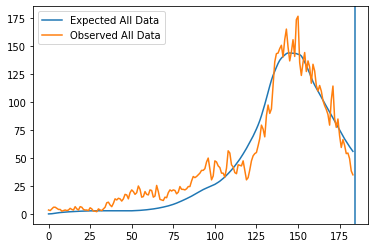

In [17]:
expected_train_test = epid_model(R=method.calculate_R(cluster_percentage_train_test), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
plt.plot(expected_train_test.cpu().detach().numpy(),label='Expected All Data')
plt.plot(observed_train_test.cpu().detach().numpy(),label='Observed All Data')
plt.axvline(x=observed_train.shape[0])
plt.legend()
plt.show()

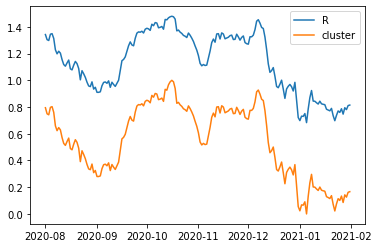

In [18]:
# Plot R-Value & Cluster Percentage
plt.plot(df_obs['Date'], method.calculate_R(cluster_percentage_train_test).cpu().detach().numpy(), label='R')
plt.plot(df_obs['Date'], cluster_percentage_train_test, label='cluster')
plt.legend()
plt.show()

## Eval on Test Data


In [19]:
expected_test = expected_train_test[-df_obs_test.shape[0]:]
comparison_loss_test = calc_mse(expected_test, observed_test) * dict_param['real_values']['phi']
print(f'Comparison Loss Train: {comparison_loss_train} - Comparison Loss Test: {comparison_loss_test}')

plt.plot(df_obs_test['Date'], expected_test.cpu().detach().numpy(),label='Expected Test Data')
plt.plot(df_obs_test['Date'], observed_test.cpu().detach().numpy(),label='Observed Test Data')
plt.legend()
plt.show()

RuntimeError: ignored

In [ ]:
# Plot R-Value & Cluster Percentage
plt.plot(df_obs_test['Date'], method.calculate_R(method.cluster_percentage_test).cpu().detach().numpy(), label='R')
plt.plot(df_obs_test['Date'], method.cluster_percentage_test, label='cluster')
plt.legend()
plt.show()

## Eval What IF

In [ ]:
expected_normal = epid_model(R=method.calculate_R(cluster_percentage_train_test), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
expected_careful= epid_model(R=method.calculate_R(cluster_percentage_train_test*0.9), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
expected_crazy = epid_model(R=method.calculate_R(cluster_percentage_train_test*1.1), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]

plt.plot(expected_normal.cpu().detach().numpy(),label='normal')
plt.plot(expected_careful.cpu().detach().numpy(),label='careful')
plt.plot(expected_crazy.cpu().detach().numpy(),label='CRAZY!!')
plt.axvline(x=observed_train.shape[0])
plt.legend()
plt.show()

## Eval Cluster Percentage vs R-Value

Slope: 0.8303378062950854, intercept: 0.6785735866672157, r-squared: 0.9995145468844904


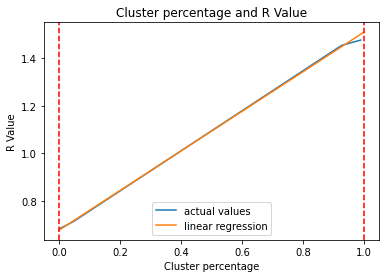

In [20]:
from scipy import stats

x = np.arange(0,1 , 0.01)
y = np.squeeze(method.calculate_R(x).cpu().detach().numpy())


x_min = cluster_percentage_train_test.min()
x_max = cluster_percentage_train_test.max()
x_bound = np.arange(x_min, x_max + 0.01 , 0.01)
y_bound = np.squeeze(method.calculate_R(x_bound).cpu().detach().numpy())

slope, intercept, r_value, p_value, std_err = stats.linregress(x_bound, y_bound)
y_linreg = intercept + slope * x_bound
print(f'Slope: {slope}, intercept: {intercept}, r-squared: {r_value**2}')
plt.plot(x, y, label='actual values')
plt.plot(x_bound, y_linreg, label='linear regression')
plt.axvline(x=x_min, c='r', linestyle='--')
plt.axvline(x=x_max, c='r', linestyle='--')
plt.xlabel('Cluster percentage')
plt.ylabel('R Value')
plt.title('Cluster percentage and R Value')
plt.legend()
plt.show()

Eval Newly Infected

In [ ]:
expected_newly = epid_model(R=method.calculate_R(cluster_percentage_train_test), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)['newly_infected']

plt.plot(expected_newly.cpu().detach().numpy(),label='Expected Newly Infected')
plt.plot(df_obs['newly_infected'],label='Observed Newly Infected')
plt.axvline(x=observed_train.shape[0])
plt.legend()
plt.show()